# Beispiel

Die lineare Funktion

$$
  f(x) = 3\,x -2
$$

wurde mit einem Messwertgeber aufgenommen. Die Messwerte sind dabei mit Fehlern von $\pm 5\%$ behaftet.

Aus den Messwerten soll die Funktion so gut wie möglich rekonstruiert werden. Dazu wird die Methode der kleinsten Quadrate benutzt.

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

In [2]:
# Steigung und Achenabschnitt
a_0 = 3
b_0 = -2

# Messfehler:
epsilon = 5.0e-2 # 5%

Zunächst werden die Messwerte eingelesen. Sie stammen aus der `csv`-Datei `Messdaten.csv`. Dazu wird aus dem Modul `pandas` die Funktion `read_csv()` benutzt. Sie hat eine Reihe von Aufrufparametern, die man über die Tabulatorfunktion anzeigen lassen kann. In diesem Fall lautet der Aufruf einfach:

`df = pd.read_csv('Messdaten.csv')`

Dabei ist 'Messdaten.csv' die vollständige Pfadangabe, in diesem Fall liegt die Datei deshalb im gleichen Pfad.

In [3]:
df = pd.read_csv('Messdaten.csv')
df

,x,y
0,0.0,-1.711433
1,1.0,1.369431
2,2.0,4.303299
3,3.0,6.890376
4,4.0,10.038289
5,5.0,13.244760
6,6.0,15.873956
7,7.0,19.575683
8,8.0,22.277090
9,9.0,24.851776


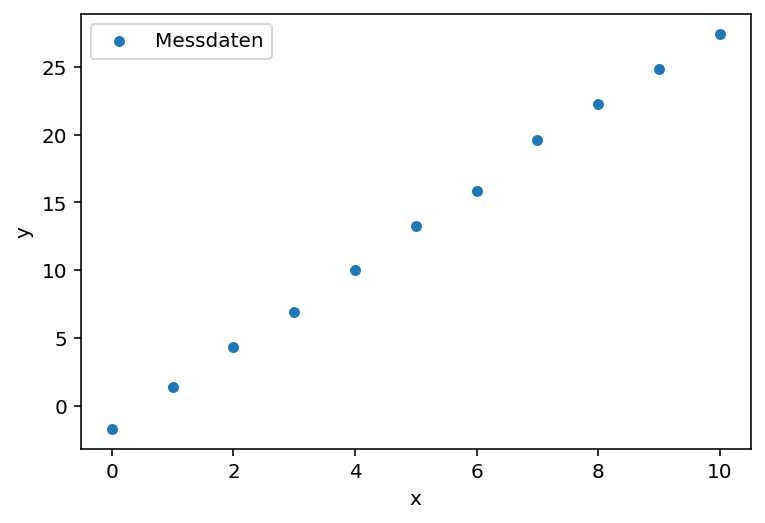

In [4]:
ax = df.plot(kind='scatter', x='x', y='y', label='Messdaten')

Man erkennt, dass die Punkte nicht exakt auf einer Geraden liegen, die Abweichung aber nicht sehr groß ist.

Zur Berechnung der Regressionsgraden 

$$
  y = a\,x + b
$$

werden zwei Parameter $a$ und $b$ benötigt. Diese sollen so ermittelt werden, dass der Messfehler insgesamt minimal wird. Für jeden einzelnen Punkt $(x_i,y_i)$ ist der Messfehler

$$
  \text{fehler}_i = a\,x_i + b - y_i 
$$ 

In [5]:
a,b = symbols('a,b')

df['fehler'] = a*df.x + b - df.y

df

,x,y,fehler
0,0.0,-1.711433,b + 1.71143320504007
1,1.0,1.369431,1.0*a + b - 1.36943071036309
2,2.0,4.303299,2.0*a + b - 4.30329932118402
3,3.0,6.890376,3.0*a + b - 6.89037592634188
4,4.0,10.038289,4.0*a + b - 10.0382886222649
5,5.0,13.244760,5.0*a + b - 13.2447598583153
6,6.0,15.873956,6.0*a + b - 15.8739556199908
7,7.0,19.575683,7.0*a + b - 19.5756833500603
8,8.0,22.277090,8.0*a + b - 22.2770896227496
9,9.0,24.851776,9.0*a + b - 24.8517762676865


Der Gesamtfehler ist durch die Fehlerquadratsumme gegeben. Dazu wird jeder einzelne Fehler quadriert. Die Ergebnisse werden aufaddiert.

Nur dann, wenn es keinen einzigen Messfehler gibt, kann der Gesamtfehler 0 sein. Durch das Quadrieren sind Fehlerbeiträge in der Summe immer positiv. Dadurch vergrößern sie den Gesamtfehler.

Die Fehlerquadratsumme wird in mehreren Schritten berechnet, um den Rechenweg leichter nachvollziehbar zu machen.

In [6]:
f_2 = df.fehler

f_2

0             b + 1.71143320504007
1     1.0*a + b - 1.36943071036309
2     2.0*a + b - 4.30329932118402
3     3.0*a + b - 6.89037592634188
4     4.0*a + b - 10.0382886222649
5     5.0*a + b - 13.2447598583153
6     6.0*a + b - 15.8739556199908
7     7.0*a + b - 19.5756833500603
8     8.0*a + b - 22.2770896227496
9     9.0*a + b - 24.8517762676865
10    10.0*a + b - 27.468008228852
Name: fehler, dtype: object

In [7]:
f_2 = df.fehler**2

f_2

0             (b + 1.71143320504007)**2
1     (1.0*a + b - 1.36943071036309)**2
2     (2.0*a + b - 4.30329932118402)**2
3     (3.0*a + b - 6.89037592634188)**2
4     (4.0*a + b - 10.0382886222649)**2
5     (5.0*a + b - 13.2447598583153)**2
6     (6.0*a + b - 15.8739556199908)**2
7     (7.0*a + b - 19.5756833500603)**2
8     (8.0*a + b - 22.2770896227496)**2
9     (9.0*a + b - 24.8517762676865)**2
10    (10.0*a + b - 27.468008228852)**2
Name: fehler, dtype: object

In [8]:
f_2 = (df.fehler**2).sum()

f_2

In [9]:
f_2 = (df.fehler**2).sum().expand()

f_2

Die Fehlerquadratsumme ist ein Ausdruck, in dem sowohl $a^2$ und $a$, als auch $b^2$ und $b$ auftreten. Die Koeffizienten $a$ und $b$ sollen so gewählt werden, dass die Fehlerquadratsumme so klein wie möglich ist.

Stellen wir uns vor, dass $b$ bekannt ist. Dann bleibt nur noch ein quadratischer Ausdruck von $a$ übrig. Dieser nimmt seinen kleinsten Wert aber im Scheitelpunkt an! Es muss also $a$ als Scheitelpunkt der Fehlerquadratsumme als Funktion von $a$ gewählt werden.

Das führt auf eine Gleichung

$$
  a = \text{Scheitelpunkt der Fehlerquadratsumme als Funktion von $a$}
$$

Stellen wir uns nun vor, $a$ sei schon bekannt. Dann bleibt nur noch eine quadratische Funktion von $b$ übrig. Die gleiche Überlegung wie oben führt auf die zweite Gleichung

$$
  b = \text{Scheitelpunkt der Fehlerquadratsumme als Funktion von $b$}
$$

Diese beiden Gleichungen lassen sich mit `sympy` leicht aufstellen:

In [10]:
lgs = [
    Eq(a,-f_2.coeff(a,1)/(2*f_2.coeff(a,2))),
    Eq(b,-f_2.coeff(b,1)/(2*f_2.coeff(b,2)))
]

for glg in lgs:
    display(glg)

In [11]:
lsg = solve(lgs)
lsg

In [12]:
err = f_2.subs(lsg)
err

Der durchschnittliche quadratische Fehler ergibt sich, wenn die Fehlervariable `err` durch die Anzahl der Messwerte dividiert wird. Diese Anzahl entspricht der Länge von `df`

In [13]:
err_m = err/len(df)
err_m

Um den Fehler noch genauer abschätzen zu können, wird der relative quadratische Fehler berechnet. Dieser ergibt sich aus dem Verhältnis des mittleren Fehlers zum maximalen `y`-Wert:

In [14]:
err_rel = err_m/max(df.y.abs())
err_rel

Mit etwa 2.5 Promille ist der relative Fehler sehr klein. 

In [15]:
x = Symbol('x')
f = lambdify(x, (a*x+b).subs(lsg))

df_regr = pd.DataFrame(
    {
        'x': df.x,
        'y': df.y,
        'regr': f(df.x)
    }
)

df_regr

,x,y,regr
0,0.0,-1.711433,-1.663262
1,1.0,1.369431,1.290867
2,2.0,4.303299,4.244997
3,3.0,6.890376,7.199126
4,4.0,10.038289,10.153255
5,5.0,13.244760,13.107385
6,6.0,15.873956,16.061514
7,7.0,19.575683,19.015644
8,8.0,22.277090,21.969773
9,9.0,24.851776,24.923903


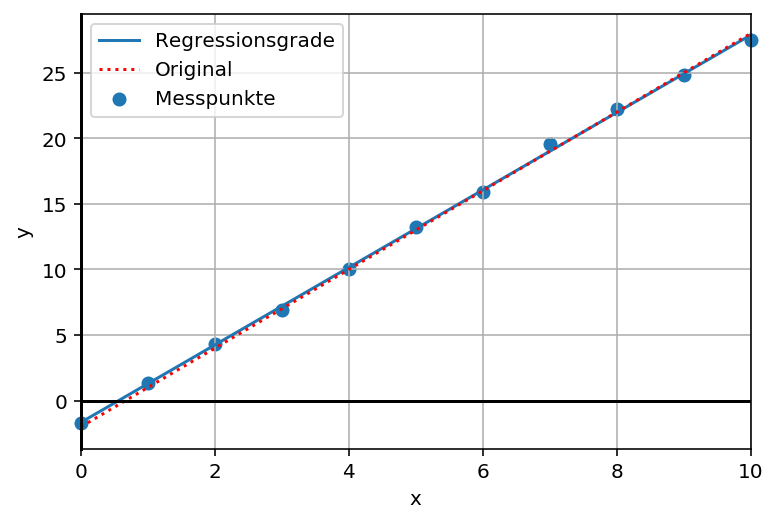

In [16]:
ax = df_regr.plot(x='x',y='regr', label='Regressionsgrade')
ax.scatter(df.x,df.y,label='Messpunkte',clip_on=False)
ax.plot(df.x, a_0*df.x+b_0,c='r',ls='dotted',label='Original')
ax.grid()

ax.axhline(0,c='k')
ax.axvline(0,c='k',clip_on=False)
ax.set(xlabel='x',ylabel='y')
ax.legend()
plt.show()

In der Praxis wird dieses Gleichungssystem nicht von Hand aufgestellt und gelöst. Dazu gibt es Programme, die dabei Unterstützung leisten. Ein solches Modul ist `scipy.optimize`. Dieser Modul enthält eine Funktion `curve_fit`, die Zur Kurvenanpassung benutzt werden kann. Dabei ist nicht nur die lineare Kurvenanpassung (also die Anpassung an eine lineare Funktion) möglich.

In [17]:
from scipy.optimize import curve_fit

Die Funktion `curve_fit` benötigt eine Information darüber, wie die Kurve aussehen soll, die angepasst werden soll. Für die lineare Regression ist das die folgende Funktion:

In [18]:
def func(x, a,b):
    return a*x+b

Die Funktion `curv_fit()` gibt Schätzwerte für die Parameter `a` und `b` zurück. Daneben wird die sogenannte Kovariansmatrix `cov_opt` für den optimalen Punkt zurückgegeben. Diese ermöglicht zum Beispiel zu überprüfen, ob die Lösung gut durch eine Geradengleichung dargestellt werden kann. Für unsere Aufgabenstellung ist das gegeben, so dass wir die Kovarianzmatrix nicht benötigen.

In [19]:
p_opt, cov_opt = curve_fit(func, df.x, df.y)
p_opt

array([ 2.95412947, -1.66326243])

In [20]:
cov_opt

array([[ 0.00076353, -0.00381765],
       [-0.00381765,  0.02672358]])

Die Werte `a` und `b` werden aus dem Ergebnis `p_opt` herausgelesen:

In [21]:
a,b = p_opt
a,b

Der Vergleich mit der Lösung des linearen Gleichungssystems zeigt, dass diese praktisch übereinstimmen. Abweichungen treten in diesem Beispiel erst nach der 10-ten Nachkommastelle auf.

In [22]:
lsg